## Notebook for visualising the output of the UNET

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mat73
import scipy.io as sio
import scipy.ndimage
import scipy
import pickle
from tqdm import tqdm

In [2]:
with open('Datasets/SpinningOPChangeNoisy/SpinningOPChangeNoisyWithUNETFinal.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [4]:
unsmoothed = data['HbOvol']
unet = data['HbOvol_unet']
smoothed = data['HbOvol_smoothed']
ground_truth = data['ground_truth']
del data

In [5]:
mask = sio.loadmat('mask.mat')['mask']

In [6]:
for i in tqdm(range(unet.shape[-1])):
        smoothed[...,i] = smoothed[...,i] * mask
        unsmoothed[...,i] = unsmoothed[...,i] * mask
        unet[...,i] = unet[...,i] * mask

100%|██████████| 756/756 [00:04<00:00, 167.60it/s]


In [14]:
i=0
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(abs(ground_truth[:,:,:,i])>np.max(ground_truth[...,i])/2, alpha=1)
ax.azim = 90

plt.show()

KeyboardInterrupt: 

In [11]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(abs(unet[:,:,:,i])>np.max(unet[...,i])/2, alpha=1)
ax.azim = 90

plt.show()

KeyboardInterrupt: 

In [12]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(abs(unsmoothed[:,:,:,i])>np.max(unsmoothed[...,i])/2, alpha=1)
ax.azim = 90

plt.show()

KeyboardInterrupt: 

In [13]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(abs(smoothed[:,:,:,i])>np.max(smoothed[...,i])/2, alpha=1)
ax.azim = 90

plt.show()

KeyboardInterrupt: 

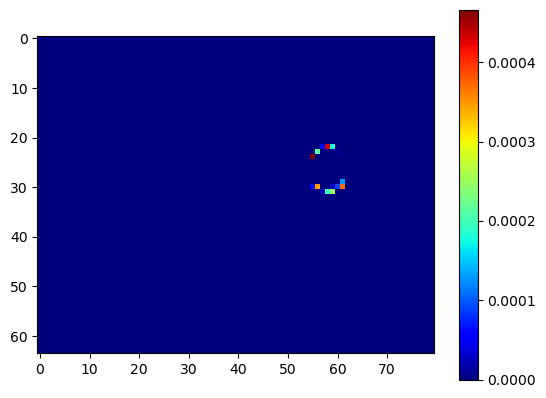

In [18]:
j=15
plt.imshow(ground_truth[::-1,j,::-1,i].T, cmap='jet')
plt.colorbar()
plt.show()

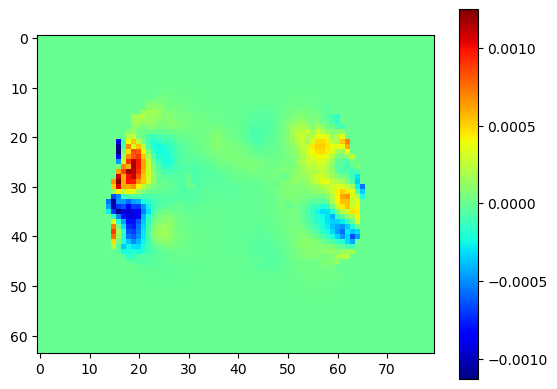

In [19]:
plt.imshow(unsmoothed[::-1,j,::-1,i].T, cmap='jet')
plt.colorbar()
plt.show()

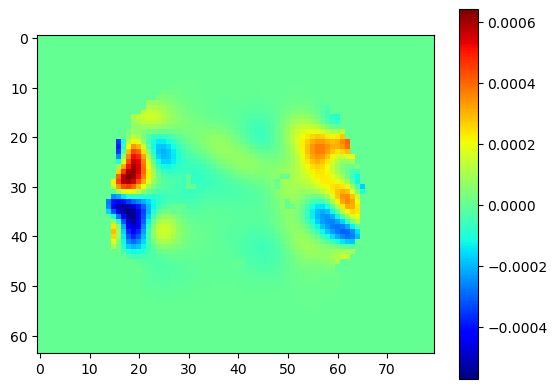

In [20]:
plt.imshow(smoothed[::-1,j,::-1,i].T, cmap='jet')
plt.colorbar()
plt.show()

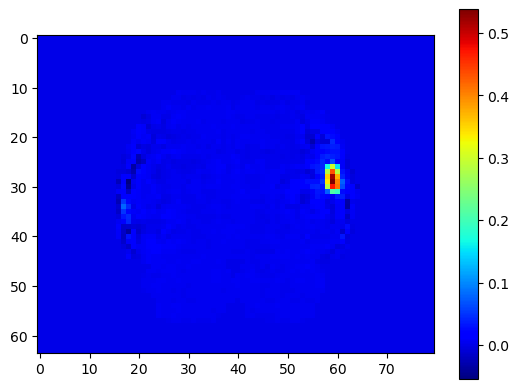

In [17]:
j=14
plt.imshow(unet[::-1,j,::-1,i].T, cmap='jet')
plt.colorbar()
plt.show()